In [12]:
import joblib
import eli5
from FeatureTransformer import FeatureTransformer
import pandas as pd
import ast
import spacy
from Custom import *
from sklearn_crfsuite import metrics
from model.evaluation_utils import visualize_transitions, print_annotated_text, crf_roc_curve

In [13]:
# Load the Test data
TEST_FILENAME = "../01_data/preprocessedData/dev_sentences_IO_with_plausible_answers.csv"
df_test = pd.read_csv(TEST_FILENAME)
df_test["askable_tokens"] = [ast.literal_eval(t) for t in df_test["askable_tokens"]]
df_test["sentence_tokens"] = [ast.literal_eval(t) for t in df_test["sentence_tokens"]]

y_test = df_test["askable_tokens"]

TRAIN_FILENAME = "../01_data/preprocessedData/train_sentences_IO_with_plausible_answers.csv"
df_train = pd.read_csv(TRAIN_FILENAME)
df_train["askable_tokens"] = [ast.literal_eval(t) for t in df_train["askable_tokens"]]
df_train["sentence_tokens"] = [ast.literal_eval(t) for t in df_train["sentence_tokens"]]

df_train = df_train.sample(n=100, random_state=1)

y_train = df_train["askable_tokens"]

In [14]:
nlp = spacy.load('en_core_web_sm')
nlp.tokenizer = custom_tokenizer(pd.concat([df_train, df_test], ignore_index=True), nlp)

feature_transformer = FeatureTransformer(nlp)

In [15]:
train_feature = feature_transformer.fit_transform(df_train["sentence_text"])
#test_feature = feature_transformer.transform(df_test["sentence_text"])

100it [00:00, 109.25it/s]
100it [00:00, 146.97it/s]


In [16]:
def flatten(list_of_lists):
    total_list = []
    for list_1 in list_of_lists:
        total_list += list_1
    return total_list

In [17]:
feature_name = '0:word.lemma'
value_IO_tuple = list(zip([x.get(feature_name, None) for x in flatten(train_feature)], flatten(df_train["askable_tokens"])))

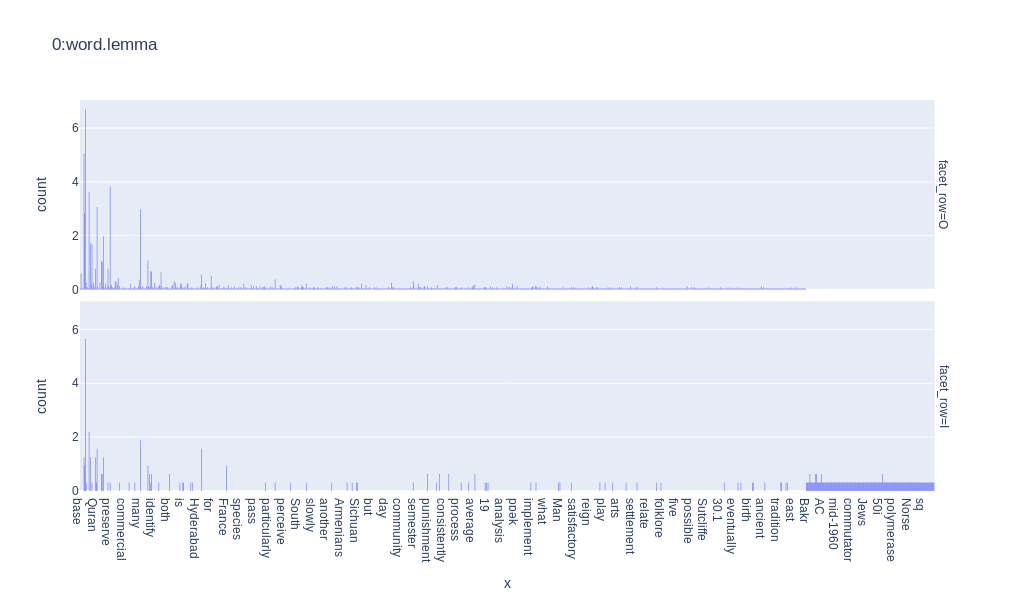

In [18]:
import plotly.express as px
px.histogram(x=[x[0] for x in value_IO_tuple],
             facet_row=[x[1] for x in value_IO_tuple],
             title=feature_name, 
             histnorm='percent')

In [8]:
nlp = spacy.load('en_core_web_md')
sentence = nlp("This is a sentence with sadsad words")
print([token.is_oov for token in sentence])
print([token.prob for token in sentence])

[False, False, False, False, False, True, False]
[-6.78391695022583, -4.457748889923096, -3.92978835105896, -10.146957397460938, -5.243249893188477, -20.0, -8.923008918762207]


In [9]:
#!python -m spacy download en_core_web_md